In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from cycler import cycler
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
companies = pd.read_csv('companies.csv')
companies = companies[pd.notnull(companies['founded_at'])]
companies['founded_year']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').year)
year = list(range(companies['founded_year'].min(),companies['founded_year'].max()+1))

In [52]:
# Helper funtion to process the data in terms of country code
def country_data(s,df):
    assert isinstance(s, basestring)
    assert isinstance(df, pd.core.frame.DataFrame)
    
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(companies[s]).count(item))
    
    pair = zip(label,frequency)
    pair.sort(key=lambda x:x[1], reverse=True)

    count=0
    i = len(pair)-1
    while(i>5):
        count = count + pair[i][1]
        del(pair[i])
        i-=1
    
    pair.append(('Other',count))
    
    return(pair)

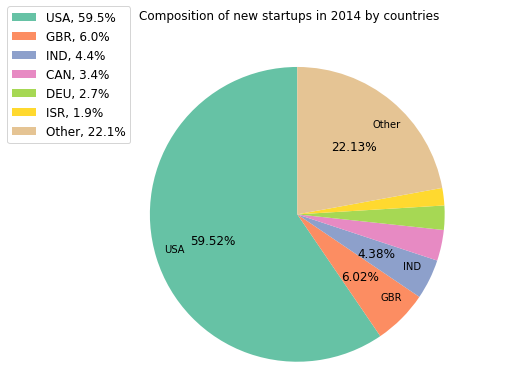

In [53]:
# Draw pie chart for the country data using pyplot.pie
companies = companies[companies['founded_year'] == 2014]
pair = country_data('country_code',companies)

def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

sizes = [pair[i][1] for i in range(len(pair))]
total = sum(sizes)
labels = [pair[i][0] for i in range(len(pair))]
label_cond=[]
for i in range(len(labels)):
    if sizes[i]>0.04*total:
        label_cond.append(labels[i])
    else:
        label_cond.append('')           
fig,ax = plt.subplots(figsize=(8, 6))
theme = plt.get_cmap('Set2')
ax.set_prop_cycle( cycler('color',[theme(1.*i/len(pair)) for i in range(len(pair))]))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
_, _, autotexts = ax.pie(sizes, labels=label_cond, labeldistance=0.8, 
                         autopct=autopct_generator(4), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_size('large')
ax.axis('equal')
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig.transFigure
)
plt.suptitle('Composition of new startups in 2014 by countries')
plt.show()

#countrypie = "%s_country_pie.png" % pname
#plt.savefig(countrypie)

In [74]:
# Helper funtion to process the data in terms of state code
def state_data(s,df):
    assert isinstance(s, basestring)
    assert isinstance(df, pd.core.frame.DataFrame)
    
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(companies[s]).count(item))
    
    pair = zip(label,frequency)
    pair.sort(key=lambda x:x[1], reverse=True)
    
    state=list(range(len(pair)))
    num=list(range(len(pair)))
    for i in range(len(pair)):
        state[i] = pair[i][0]
        num[i] = pair[i][1]
    state_df = pd.DataFrame(
    {'state_code': state,
     'number_startups': num,
    })
    
    return(state_df)

In [93]:
# Draw Choropleth Maps for the state data using plotly
init_notebook_mode(connected=True)
companies = companies[companies['founded_year'] == 2014]
usa = companies[companies['country_code']=="USA"]
df =state_data('state_code',usa)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['state_code'],
        z = df['number_startups'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Startups")
        ) ]

layout = dict(
        title = '2014 US New Startups by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, filename='d3-cloropleth-map' )

In [ ]:
## Alternative way to split founded_data into founded_year/month/day
m = len(companies.index)
n = len(companies.columns)

year=[]
month=[]
day=[]

for i in range(m):
    date = companies['founded_at'].iloc[i].split('-')
    year.append(date[0])
    month.append(date[1])
    day.append(date[2])

companies['founded_year'] = year
companies['founded_month']= month
companies['founded_day']= day